In [4]:
import pandas as pd
import numpy as np

In [13]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [15]:
#  1. 데이터 준비
x = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX",
                             "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIDO",
                             "B", "LSTAT"])
y = pd.DataFrame(target, columns=["PRICE"])
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIDO       B  LSTAT  
0        15.3  396.90   4.98  
1        17.8  396.90   9.14  
2     

In [ ]:
# 스케일링
# 스스로 공부해보기 스케일링 넣어서 


In [27]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score

#  r2_score 
# R Squared(결정계수) : 예측값 Variance / 실제값 Variance(1에 가까울수록 정확도가 높다)

In [28]:
# 2. 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [29]:
# 3. 모델 선택
model = DecisionTreeRegressor(max_depth=4)

In [30]:
# 4. 모델 학습
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [31]:
# 5. 모델 평가
model.score(x_test, y_test)

0.8646893116543823

In [32]:
# 6. 모델 예측
predict = model.predict(x_test)
r2_score (y_test, predict)

0.8646893116543823

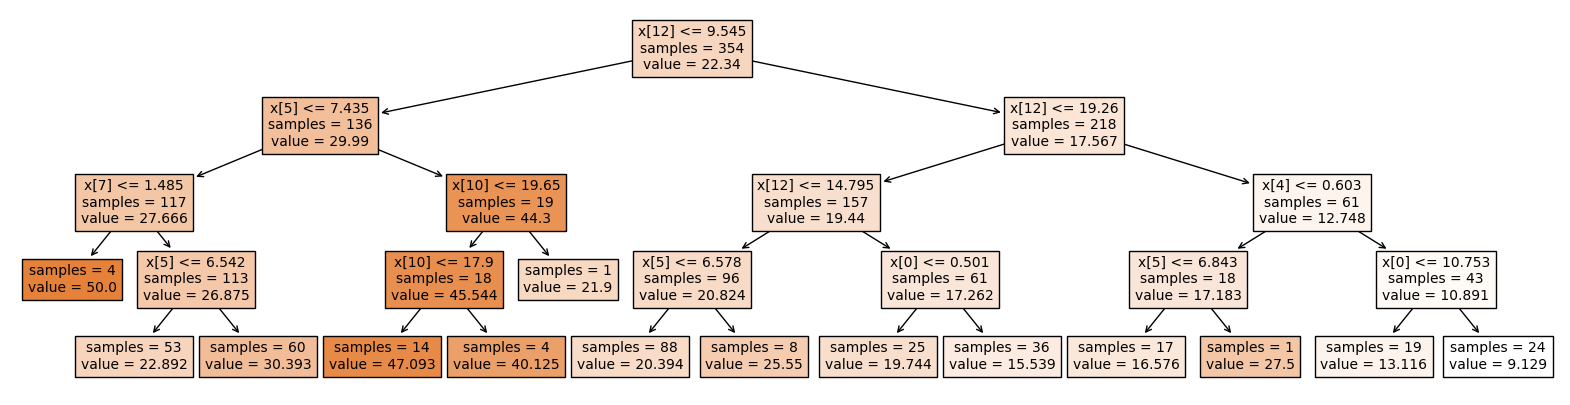

In [33]:
plt.figure(figsize=(20, 5))
plot_tree(model, impurity=False, filled=True, fontsize=10)
plt.show()
# value값이 클수록 진하다. 결과값에 영향을 많이 미친 애들의 색이 진하다.

In [34]:
import seaborn as sns

<Axes: >

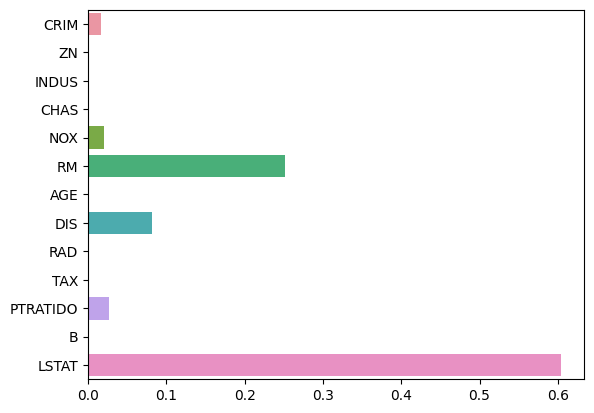

In [35]:
sns.barplot(x=model.feature_importances_, y=x.columns)
# 모델이 결과를 많이 내뿜는데 LSTAT를 가장 많이 사용했다는 의미